In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

- 데이터: https://dacon.io/competitions/official/235736/overview/description

In [66]:
df = pd.read_csv('../../../../energy/train.csv',encoding='cp949')
df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [67]:
energy = df[['date_time','전력사용량(kWh)']]
energy.head()

,date_time,전력사용량(kWh)
0,2020-06-01 00,8179.056
1,2020-06-01 01,8135.640
2,2020-06-01 02,8107.128
3,2020-06-01 03,8048.808
4,2020-06-01 04,8043.624


In [68]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date_time   122400 non-null  object 
 1   전력사용량(kWh)  122400 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [69]:
energy.loc[:, 'date_time'] =  pd.to_datetime(energy['date_time'].astype(str), format='%Y-%m-%d %H')
energy = energy.sort_values(by='date_time')
energy.head()

,date_time,전력사용량(kWh)
0,2020-06-01 00:00:00,8179.056
67320,2020-06-01 00:00:00,530.388
69360,2020-06-01 00:00:00,553.824
71400,2020-06-01 00:00:00,797.472
73440,2020-06-01 00:00:00,1476.720


- 60개 건물에 대해서 보는 것임. -> 날짜 별 하나의 값만 남게...

In [71]:
# 'date_time'으로 그룹화하여 평균 전력사용량 계산
energy_grouped = energy.groupby('date_time')['전력사용량(kWh)'].mean().reset_index()

# 결과 확인
print(energy_grouped.head())

            date_time   전력사용량(kWh)
0 2020-06-01 00:00:00  1665.076950
1 2020-06-01 01:00:00  1630.213888
2 2020-06-01 02:00:00  1594.097142
3 2020-06-01 03:00:00  1544.555640
4 2020-06-01 04:00:00  1536.407105


In [72]:
energy_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date_time   2040 non-null   datetime64[ns]
 1   전력사용량(kWh)  2040 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.0 KB


# 시각화 ㄱㄱ

## 시간 별 평균 추세 그래프

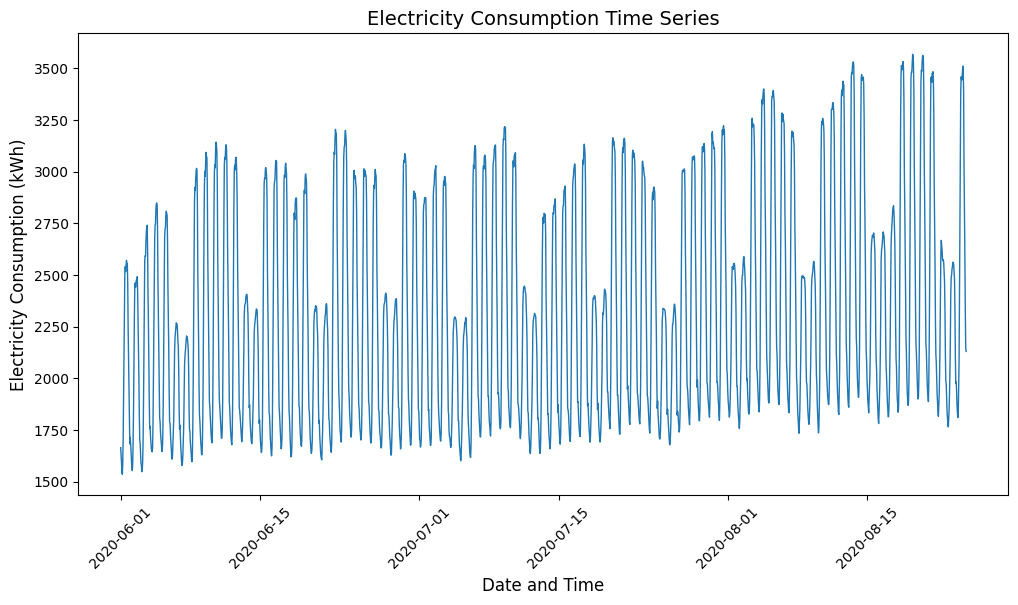

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(energy_grouped['date_time'], energy_grouped['전력사용량(kWh)'], linewidth=1)
plt.title('Electricity Consumption Time Series', fontsize=14)
plt.xlabel('Date and Time', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 시간대별 평균 전력 사용량

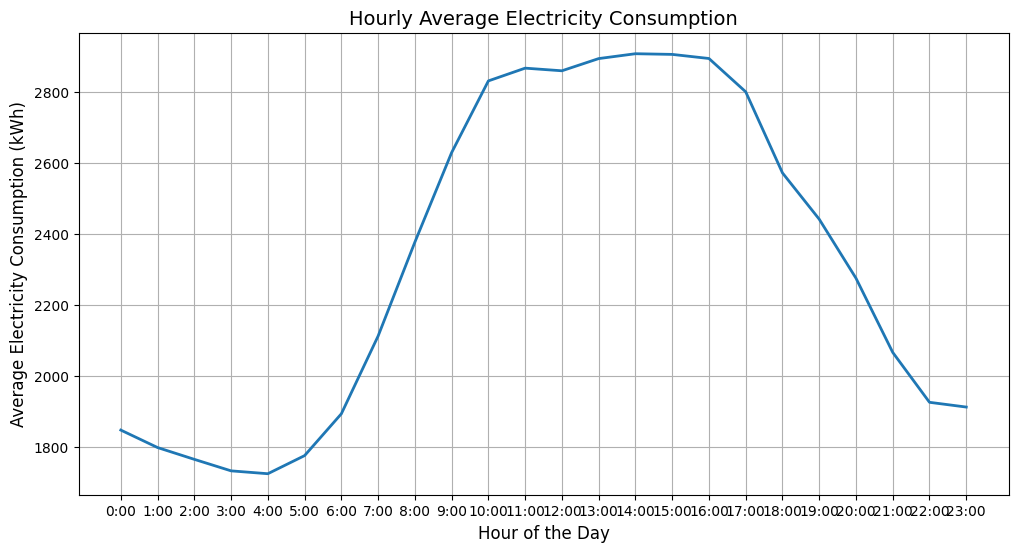

In [74]:
energy_grouped['hour'] = energy_grouped['date_time'].dt.hour

# 시간대별 전력 사용량의 평균 계산
hourly_avg_energy = energy_grouped.groupby('hour')['전력사용량(kWh)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg_energy, x='hour', y='전력사용량(kWh)', linewidth=2)
plt.title('Hourly Average Electricity Consumption', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Electricity Consumption (kWh)', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)])  # 0시부터 23시까지 표시
plt.grid(True)
plt.show()


In [75]:
# 'date_time'에서 날짜와 시간 정보 추출
energy_grouped['date'] = energy_grouped['date_time'].dt.date
energy_grouped['month'] = energy_grouped['date_time'].dt.month
energy_grouped['hour'] = energy_grouped['date_time'].dt.hour


In [76]:
# 날짜와 시간대별로 그룹화하여 전력 사용량 계산
daily_hourly_energy = energy_grouped.groupby(['date', 'hour', 'month'])['전력사용량(kWh)'].mean().reset_index()


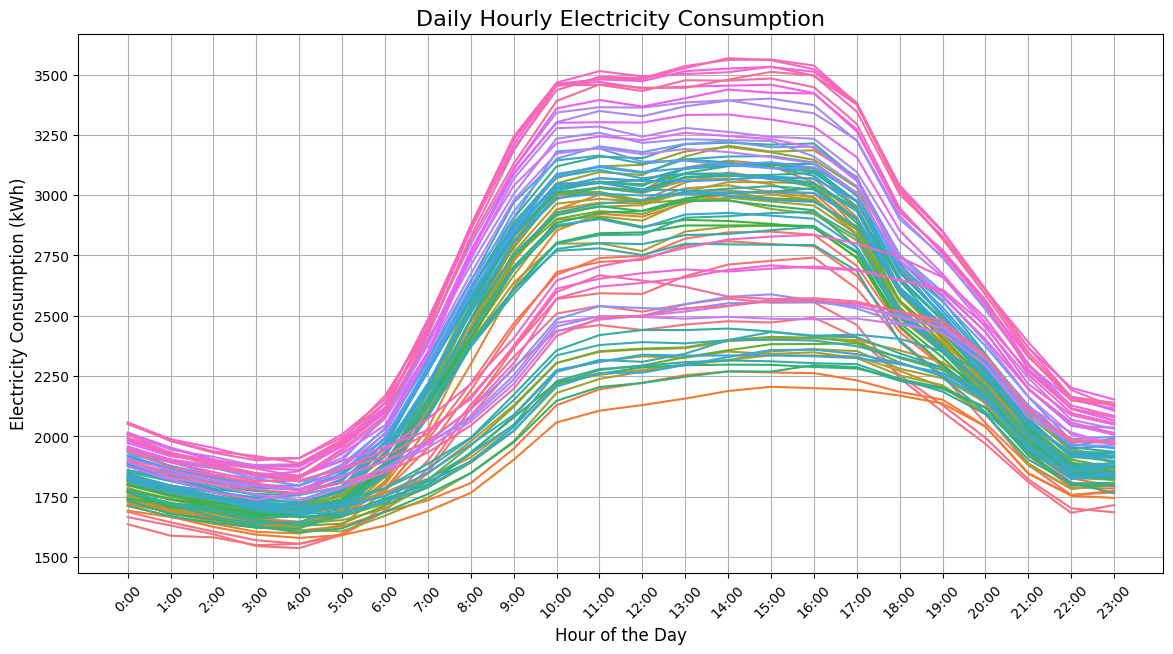

In [77]:
# 시각화
plt.figure(figsize=(14, 7))

# 각 날짜별 시간대별 전력 사용량을 선 그래프 형태로 그리기
sns.lineplot(data=daily_hourly_energy, x='hour', y='전력사용량(kWh)', hue='date', legend=None)

plt.title('Daily Hourly Electricity Consumption', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)])  # 0시부터 23시까지 표시
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### 월별 비교

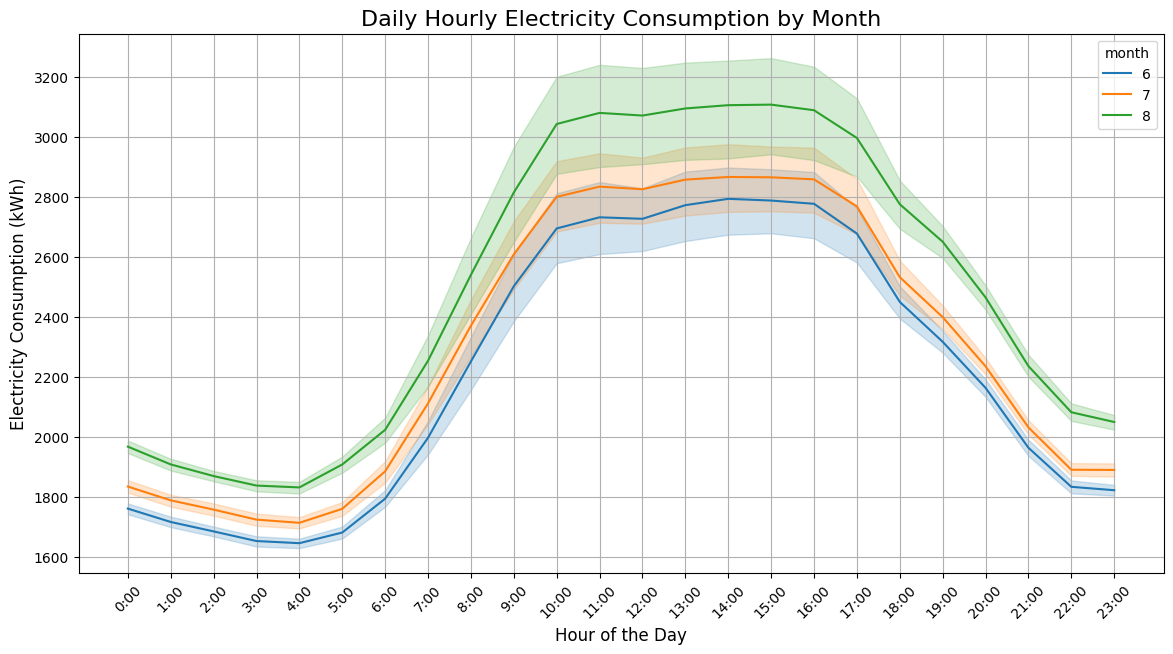

In [ ]:
plt.figure(figsize=(14, 7))

# 각 날짜별 시간대별 전력 사용량을 선 그래프 형태로 그리기
sns.lineplot(data=daily_hourly_energy, x='hour', y='전력사용량(kWh)', hue='month', palette='tab10', legend=True)

plt.title('Daily Hourly Electricity Consumption by Month', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.xticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)])  # 0시부터 23시까지 표시
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [79]:
energy_grouped

,date_time,전력사용량(kWh),hour,date,month
0,2020-06-01 00:00:00,1665.076950,0,2020-06-01,6
1,2020-06-01 01:00:00,1630.213888,1,2020-06-01,6
2,2020-06-01 02:00:00,1594.097142,2,2020-06-01,6
3,2020-06-01 03:00:00,1544.555640,3,2020-06-01,6
4,2020-06-01 04:00:00,1536.407105,4,2020-06-01,6
...,...,...,...,...,...
2035,2020-08-24 19:00:00,2817.784250,19,2020-08-24,8
2036,2020-08-24 20:00:00,2587.300725,20,2020-08-24,8
2037,2020-08-24 21:00:00,2333.097485,21,2020-08-24,8
2038,2020-08-24 22:00:00,2148.539815,22,2020-08-24,8


## 일별 평균

In [ ]:
# 날짜별로 평균 전력사용량 계산
daily_avg_energy = energy_grouped.groupby('date')['전력사용량(kWh)'].mean().reset_index()

# 결과 확인
print(daily_avg_energy.head())

         date   전력사용량(kWh)
0  2020-06-01  2058.852819
1  2020-06-02  2033.358854
2  2020-06-03  2119.283758
3  2020-06-04  2214.243028
4  2020-06-05  2200.938186


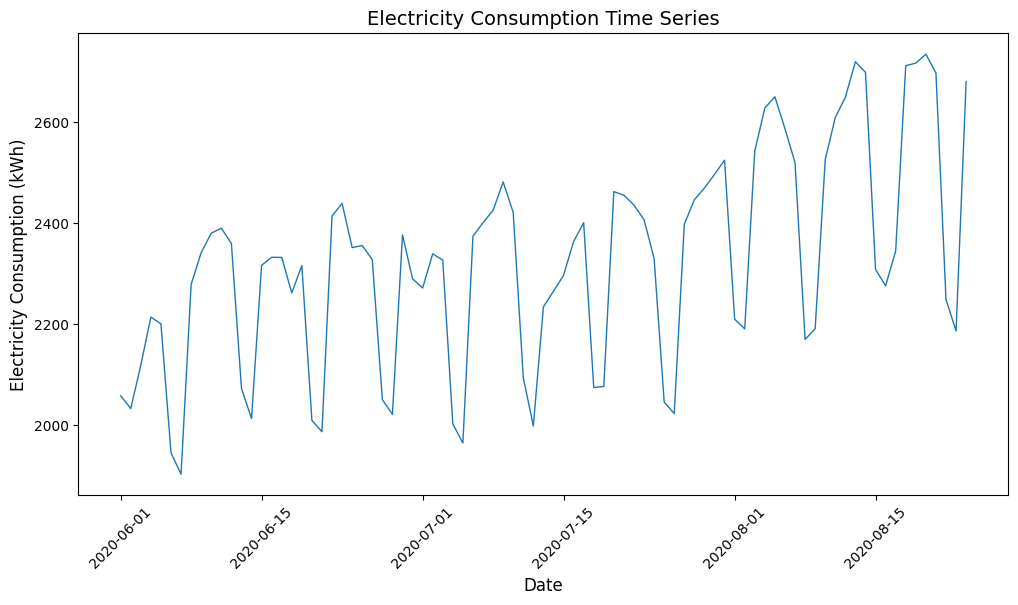

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_energy['date'], daily_avg_energy['전력사용량(kWh)'], linewidth=1)
plt.title('Electricity Consumption Time Series', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## LAG 그래프

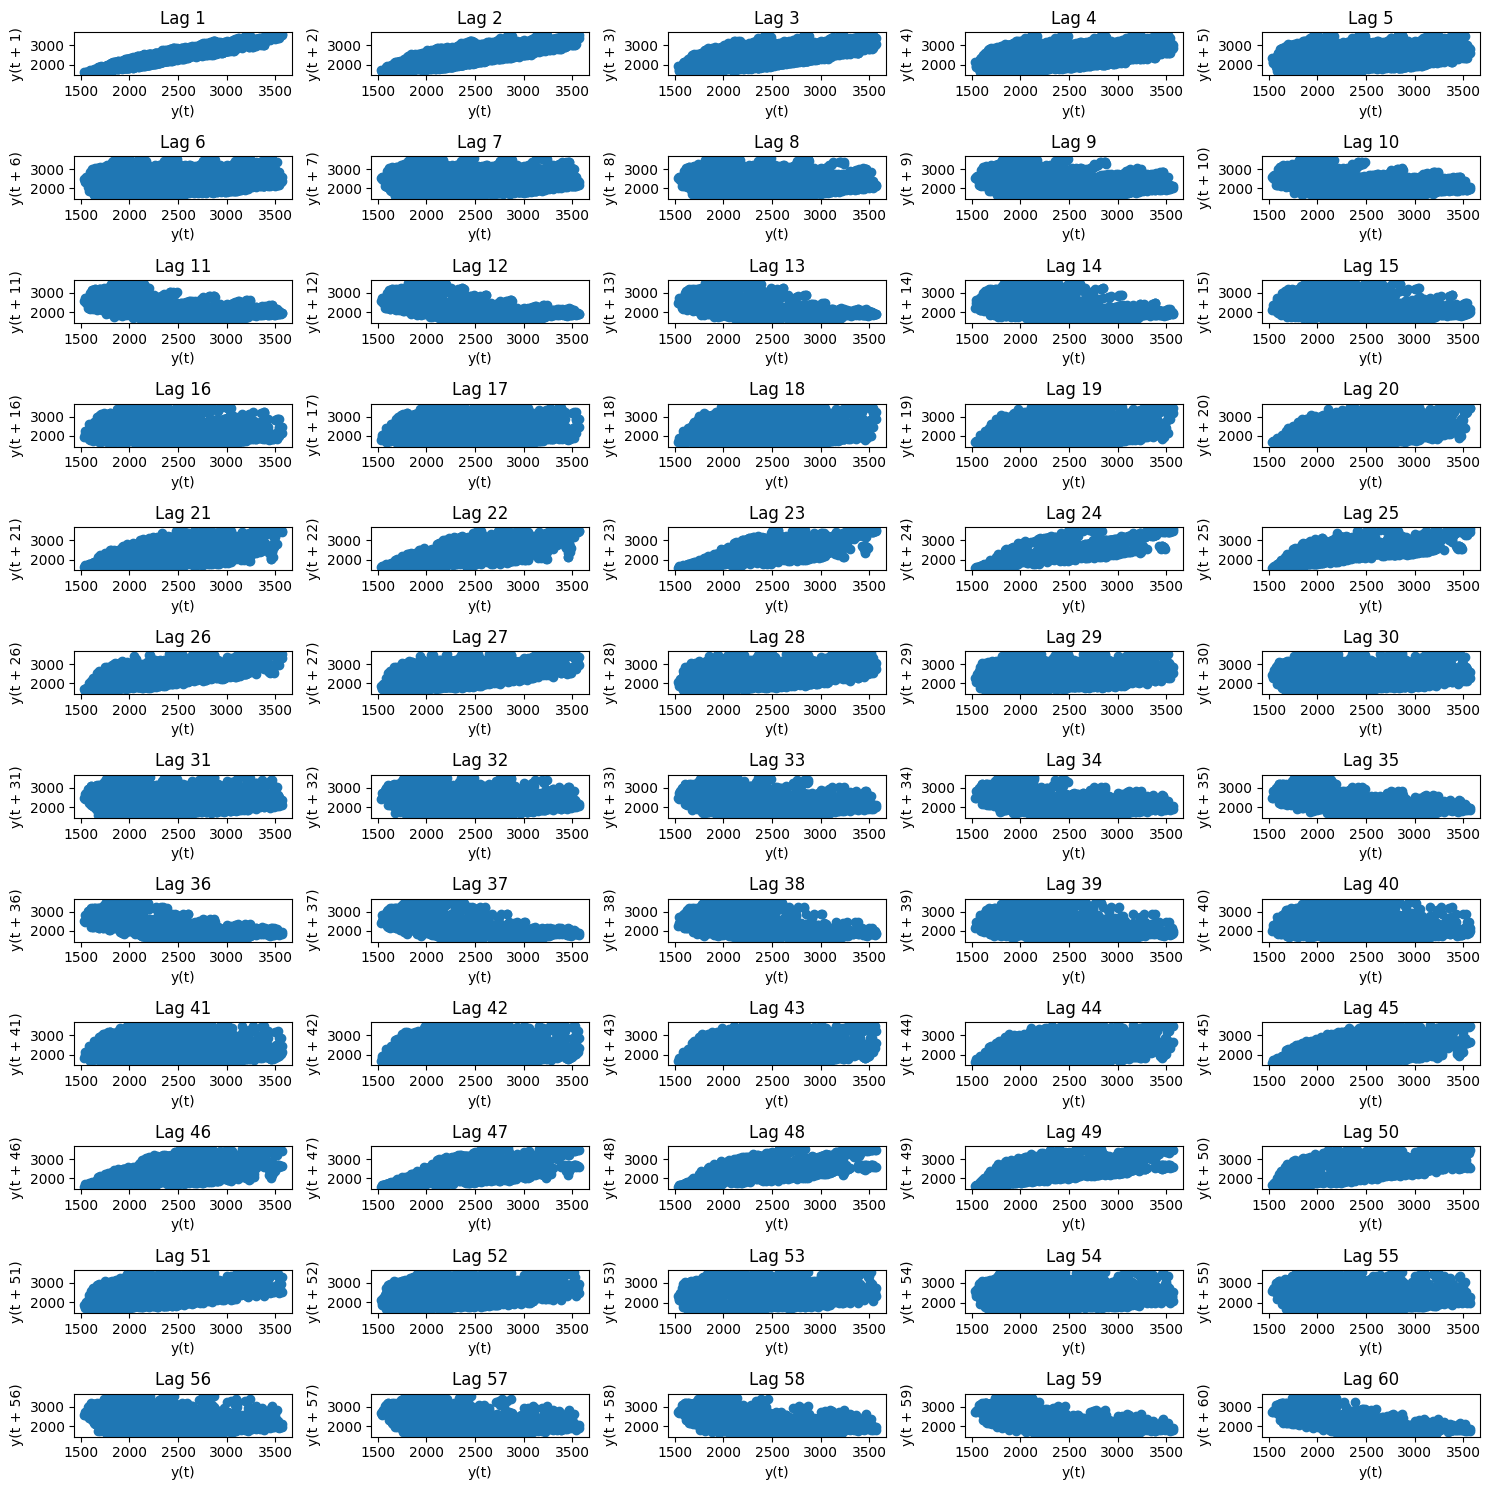

In [94]:
energy_copy = energy_grouped.copy()
energy_copy.set_index('date_time', inplace=True)

# lag 범위 설정 (0부터 60까지)
lags = range(1, 61)

# 각 lag에 대해 Lag plot을 그리기
plt.figure(figsize=(15, 15))
for i, lag in enumerate(lags, 1):
    plt.subplot(12, 5, i)  # 12행 5열로 서브플롯 배치
    lag_plot(energy_copy['전력사용량(kWh)'], lag=lag)
    plt.title(f'Lag {lag}')
    
plt.tight_layout()
plt.show()

## ACF, PACF

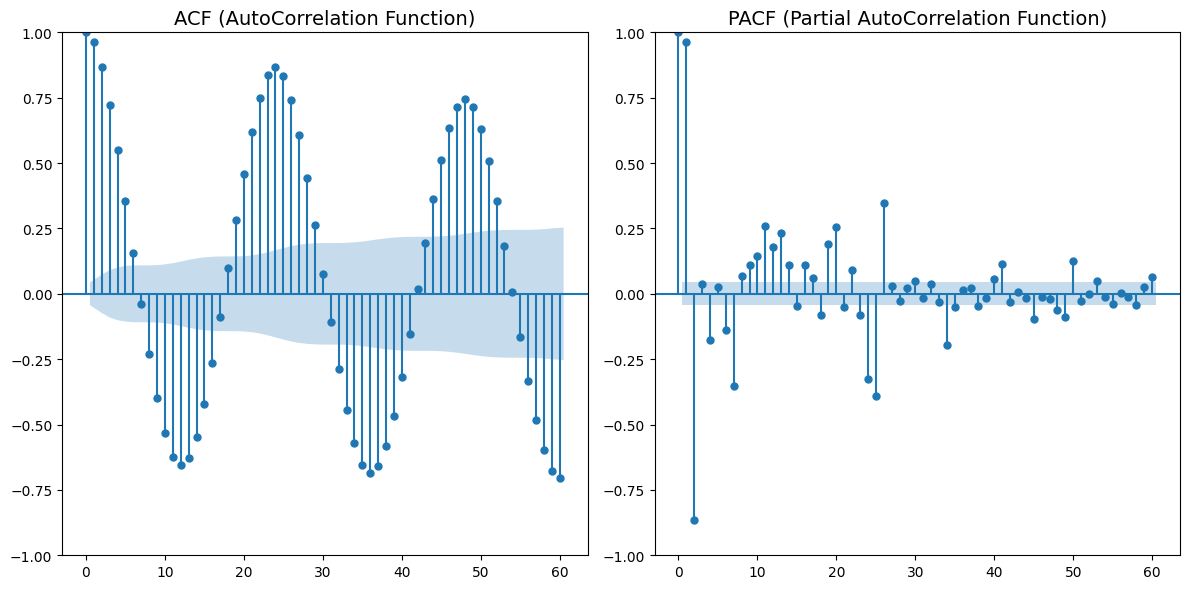

In [96]:
# 'date_time'을 인덱스로 설정, 복사본을 사용
energy_copy = energy_grouped.copy()
energy_copy.set_index('date_time', inplace=True)

# ACF와 PACF 그래프 그리기
plt.figure(figsize=(12, 6))

# ACF
plt.subplot(1, 2, 1)
plot_acf(energy_copy['전력사용량(kWh)'], lags=60, ax=plt.gca())
plt.title('ACF (AutoCorrelation Function)', fontsize=14)

# PACF
plt.subplot(1, 2, 2)
plot_pacf(energy_copy['전력사용량(kWh)'], lags=60, ax=plt.gca())
plt.title('PACF (Partial AutoCorrelation Function)', fontsize=14)

plt.tight_layout()
plt.show()

## 차분 후 ACF, PACF

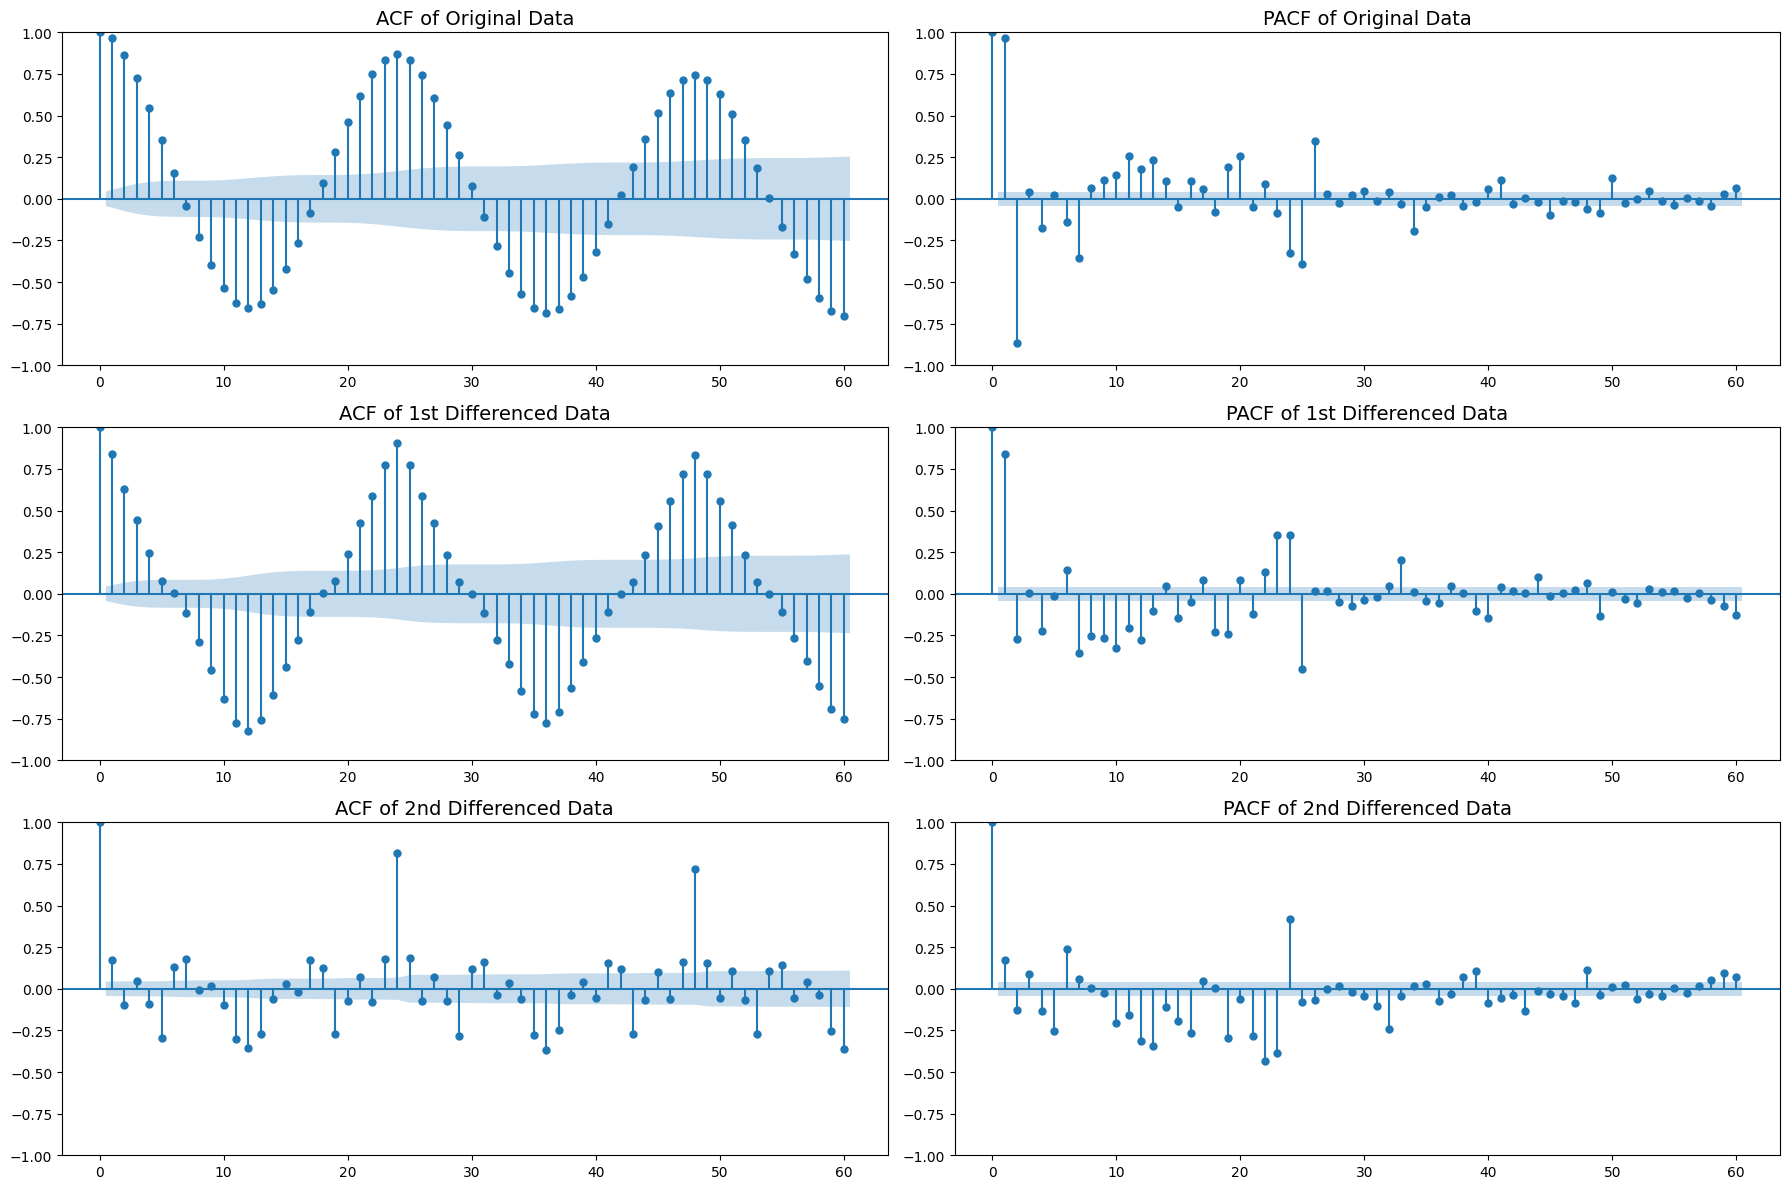

In [97]:
energy_copy = energy_grouped.copy()
energy_copy.set_index('date_time', inplace=True)

# 1차 차분 (차분을 진행한 새로운 데이터)
energy_copy['1차차분'] = energy_copy['전력사용량(kWh)'].diff()

# 2차 차분
energy_copy['2차차분'] = energy_copy['1차차분'].diff()

# ACF와 PACF 그래프 그리기
plt.figure(figsize=(18, 12))

# 원본 ACF, PACF
plt.subplot(3, 2, 1)
plot_acf(energy_copy['전력사용량(kWh)'].dropna(), lags=60, ax=plt.gca())
plt.title('ACF of Original Data', fontsize=14)

plt.subplot(3, 2, 2)
plot_pacf(energy_copy['전력사용량(kWh)'].dropna(), lags=60, ax=plt.gca())
plt.title('PACF of Original Data', fontsize=14)

# 1차 차분 ACF, PACF
plt.subplot(3, 2, 3)
plot_acf(energy_copy['1차차분'].dropna(), lags=60, ax=plt.gca())
plt.title('ACF of 1st Differenced Data', fontsize=14)

plt.subplot(3, 2, 4)
plot_pacf(energy_copy['1차차분'].dropna(), lags=60, ax=plt.gca())
plt.title('PACF of 1st Differenced Data', fontsize=14)

# 2차 차분 ACF, PACF
plt.subplot(3, 2, 5)
plot_acf(energy_copy['2차차분'].dropna(), lags=60, ax=plt.gca())
plt.title('ACF of 2nd Differenced Data', fontsize=14)

plt.subplot(3, 2, 6)
plot_pacf(energy_copy['2차차분'].dropna(), lags=60, ax=plt.gca())
plt.title('PACF of 2nd Differenced Data', fontsize=14)

plt.tight_layout()
plt.show()

## STL 분해

c:\Users\smlee\Desktop\새 폴더\25-1-StockPredictions\.venv\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
c:\Users\smlee\Desktop\새 폴더\25-1-StockPredictions\.venv\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
c:\Users\smlee\Desktop\새 폴더\25-1-StockPredictions\.venv\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
c:\Users\smlee\Desktop\새 폴더\25-1-StockPredictions\.venv\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
c:\Users\smlee\Desktop\새 폴더\25-1-StockPredictions\.venv\Lib\site-packages\statsmodels\tsa\seasonal.py:360: UserWarning: Glyph 47049 (\N{HANGUL SY

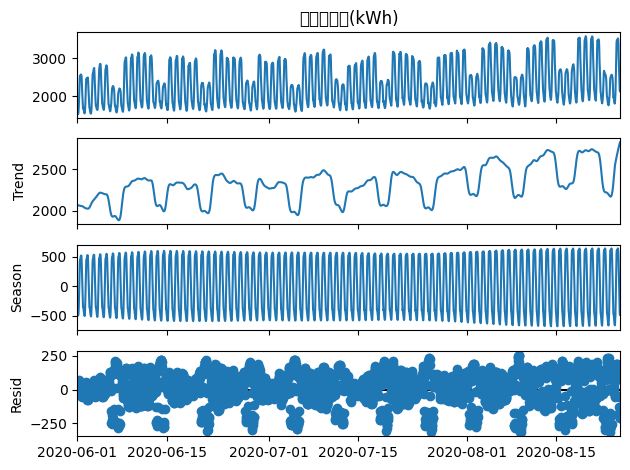

In [88]:
# STL 분해에 필요한 데이터만 추출하여 'date_time'을 인덱스로 설정
energy_grouped_stl = energy_grouped.copy()  # 원본 데이터는 그대로 두기
energy_grouped_stl.set_index('date_time', inplace=True)

# STL 분해
stl = STL(energy_grouped_stl['전력사용량(kWh)'], seasonal=23)  # seasonal=24로 24시간 주기로 설정 (하루 단위)
result = stl.fit()

# STL 분해 결과 시각화
result.plot()
plt.show()
